In [1]:
import pandas as pd
import seaborn as sns
import mzgeohash
import matplotlib.pyplot as plt
from math import radians,cos,sin,asin,sqrt
%matplotlib inline
train=pd.read_csv("/Applications/桌面文件夹/STONE/摩拜单车直播20190311/train.csv",sep=',',parse_dates=['starttime'])
test=pd.read_csv("/Applications/桌面文件夹/STONE/摩拜单车直播20190311/test.csv",sep=',',parse_dates=['starttime'])

In [2]:
train.head()

,orderid,userid,bikeid,biketype,starttime,geohashed_start_loc,geohashed_end_loc
0,1893973,451147,210617,2,2017-05-14 22:16:50,wx4snhx,wx4snhj
1,4657992,1061133,465394,1,2017-05-14 22:16:52,wx4dr59,wx4dquz
2,2965085,549189,310572,1,2017-05-14 22:16:51,wx4fgur,wx4fu5n
3,4548579,489720,456688,1,2017-05-14 22:16:51,wx4d5r5,wx4d5r4
4,3936364,467449,403224,1,2017-05-14 22:16:50,wx4g27p,wx4g266


In [3]:
print(train.shape)

(3214096, 7)


In [4]:
print(test.shape)

(2002996, 6)


In [55]:
train=train.sample(frac=0.2)

In [82]:
def _processData(df):
    #Time
    df['weekday']=df['starttime'].apply(lambda s:s.weekday())
    df['hour']=df['starttime'].apply(lambda s:s.hour)
    df['day']=df['starttime'].apply(lambda s: str(s)[:10])
    df['isWeekend']=df['weekday'].apply(lambda s:1 if (s==5 or s==6) else 0)
    print("Time process successfully!!!")
    
    #Geohash
    df['start_lat_lng']=df['geohashed_start_loc'].apply(lambda s:mzgeohash.decode(s))
    df['end_lat_lng']=df['geohashed_end_loc'].apply(lambda s:mzgeohash.decode(s))
    df['start_neighbors']=df['geohashed_start_loc'].apply(lambda s:mzgeohash.neighbors(s))
    
    df['geohashed_start_loc_6']=df['geohashed_start_loc'].apply(lambda s:s[:6])
    df['geohashed_end_loc_6']=df['geohashed_end_loc'].apply(lambda s:s[:6])
    df['start_neighbors_6']=df['geohashed_start_loc_6'].apply(lambda s:mzgeohash.neighbors(s))
    
    print("Geohash process successfully!!!")
    
    #判断目的地是否在neighbors
    def inGeohash(start_geohash,end_geohash,names):
        names=list(names)
        names.append(start_geohash)
        if end_geohash in names:
            return 1
        else:
            return 0
    df['inside']=df.apply(lambda s:inGeohash(s['geohashed_start_loc'],s['geohashed_end_loc'],s['start_neighbors']),axis=1)
    df['inside_6']=df.apply(lambda s:inGeohash(s['geohashed_start_loc_6'],s['geohashed_end_loc_6'],s['start_neighbors_6']),axis=1)
    print("Geohash inside process successfully!!!")
    #Distance start->end
    def haversine(lon1,lat1,lon2,lat2):
        """
        Calculate the great ciecle distance between two points
        on the earth (specified in decimal degrees)
        """
        lon1,lat1,lon2,lat2=map(radians,[lon1,lat1,lon2,lat2])
        #haversine公式
        dlon=lon2-lon1
        dlat=lat2-lat1
        a =sin(dlat/2)**2+cos(lat1)*cos(lat2)*sin(dlon/2)**2
        c=2*asin(sqrt(a))
        r=6731#地球平均半径，单位为公里
        return c*r*1000
    df["start_end_distance"]=df.apply(lambda s:haversine(s['start_lat_lng'][1],s['start_lat_lng'][0],s['end_lat_lng'][1],s['end_lat_lng'][0]),axis=1)
    print("Distance process successfully!!")
    return df  

In [83]:
train = _processData(train)

Time process successfully!!!
Geohash process successfully!!!
Geohash inside process successfully!!!
Distance process successfully!!


In [84]:
train.head()

,orderid,userid,bikeid,biketype,starttime,geohashed_start_loc,geohashed_end_loc,weekday,hour,day,...,end_lat_lng,start_neighbors,geohashed_start_loc_6,geohashed_end_loc_6,geohashed_neighbors_6,inside,start_neighbors_6,inside_6,start_end_distance,isWeekend
338661,1286546,837157,152969,2,2017-05-11 12:58:11,wx4fb3w,wx4f8xy,3,12,2017-05-11,...,"(116.39808654785156, 39.85771179199219)","{'n': 'wx4fb3y', 'ne': 'wx4fb3z', 'e': 'wx4fb3...",wx4fb3,wx4f8x,"{'n': 'wx4fb6', 'ne': 'wx4fbd', 'e': 'wx4fb9',...",0,"{'n': 'wx4fb6', 'ne': 'wx4fbd', 'e': 'wx4fb9',...",0,1384.844640,0
3020310,1477712,325269,170954,2,2017-05-24 16:54:45,wx4ep8v,wx4ep8b,2,16,2017-05-24,...,"(116.34590148925781, 39.90715026855469)","{'n': 'wx4ep9j', 'ne': 'wx4ep9n', 'e': 'wx4ep8...",wx4ep8,wx4ep8,"{'n': 'wx4ep9', 'ne': 'wx4epc', 'e': 'wx4epb',...",0,"{'n': 'wx4ep9', 'ne': 'wx4epc', 'e': 'wx4epb',...",1,806.658178,0
2473870,1010215,557189,127564,2,2017-05-21 17:10:41,wx4e60t,wx4e60j,6,17,2017-05-21,...,"(116.11106872558594, 39.94697570800781)","{'n': 'wx4e60v', 'ne': 'wx4e60y', 'e': 'wx4e60...",wx4e60,wx4e60,"{'n': 'wx4e61', 'ne': 'wx4e63', 'e': 'wx4e62',...",0,"{'n': 'wx4e61', 'ne': 'wx4e63', 'e': 'wx4e62',...",1,142.008187,1
1542477,4037023,264355,412991,1,2017-05-15 13:44:47,wx4fg8n,wx4fg8h,0,13,2017-05-15,...,"(116.52717590332031, 39.85908508300781)","{'n': 'wx4fg8q', 'ne': 'wx4fg8r', 'e': 'wx4fg8...",wx4fg8,wx4fg8,"{'n': 'wx4fg9', 'ne': 'wx4fgc', 'e': 'wx4fgb',...",0,"{'n': 'wx4fg9', 'ne': 'wx4fgc', 'e': 'wx4fgb',...",1,322.663271,0
1329369,3359438,54967,347706,1,2017-05-15 11:20:44,wx4ehpq,wx4ehpu,0,11,2017-05-15,...,"(116.19758605957031, 39.94560241699219)","{'n': 'wx4ehpw', 'ne': 'wx4ehpx', 'e': 'wx4ehp...",wx4ehp,wx4ehp,"{'n': 'wx4ek0', 'ne': 'wx4ek2', 'e': 'wx4ehr',...",0,"{'n': 'wx4ek0', 'ne': 'wx4ek2', 'e': 'wx4ehr',...",1,352.709925,0


In [87]:
def _timeAnalysis(df):
    # Days
    print("数据集包含的天数如下：")
    print(df['day'].unique())
    print("*"*60)
    # 用户出行小时高峰期
    g1=df.groupby("hour")
    print(g1['orderid'].count().sort_values(ascending=False))
    print("*"*60)
    #周一 至 周日 用车分析
    g1=df.groupby("weekday")
    print(pd.DataFrame(g1['orderid'].count()))
    print("*"*60)
    
    #周一 至 周日 不同时间的用车
    df.loc[(df['weekday']==5)|(df['weekday']==6),"isWeekend"]=1
    df.loc[~((df['weekday']==5)|(df['weekday']==6)),"isWeekend"]=0
    g1=df.groupby(['isWeekend','hour'])
    
    #计算工作日与周末的天数
    g2=df.groupby(["day","weekday"])
    w=0 #周末天数
    c=0 #工作日天数
    for i,j in list(g2.groups.keys()):
        if j>=5:
            w += 1
        else:
            c +=1
    #
    temp_df=pd.DataFrame(g1['orderid'].count()).reset_index()
    temp_df.loc[temp_df['isWeekend']==0.0,'orderid']=temp_df['orderid']/c
    temp_df.loc[temp_df['isWeekend']==1.0,'orderid']=temp_df['orderid']/w
    print(temp_df.sort_values(["isWeekend","orderid"],ascending=False))
    sns.barplot(x='hour',y='orderid',hue='isWeekend',data=temp_df)
    #More plots...
    

数据集包含的天数如下：
['2017-05-11' '2017-05-24' '2017-05-21' '2017-05-15' '2017-05-16'
 '2017-05-19' '2017-05-10' '2017-05-12' '2017-05-22' '2017-05-14'
 '2017-05-18' '2017-05-20' '2017-05-13' '2017-05-23']
************************************************************
hour
7     12686
18    11535
8     11351
17    11091
19     8245
12     8200
16     7093
11     6908
13     6496
15     6256
20     6043
9      5844
14     5452
21     5070
10     5049
6      4922
22     2810
5      1188
23     1139
0       522
1       236
4       168
2       150
3       110
Name: orderid, dtype: int64
************************************************************
         orderid
weekday         
0          16198
1          17360
2          15780
3          23827
4          23167
5          14330
6          17902
************************************************************
    isWeekend  hour  orderid
42          1    18   587.50
34          1    10   580.50
32          1     8   569.50
41          1    17   541.00


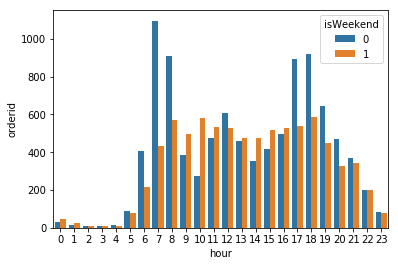

In [88]:
_timeAnalysis(train)

In [89]:
train['start_end_distance'].describe()

count    128564.000000
mean        774.637314
std         768.172640
min          70.750512
25%         356.035743
50%         645.326543
75%         967.989814
max       33880.327308
Name: start_end_distance, dtype: float64

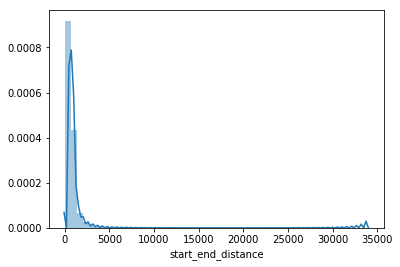

In [90]:
sns.distplot(train['start_end_distance'])

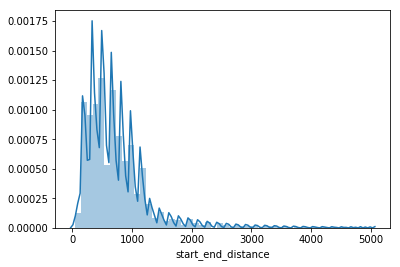

In [22]:
start_end_distance=train['start_end_distance']
start_end_distance=start_end_distance.loc[start_end_distance<5000]
sns.distplot(start_end_distance)

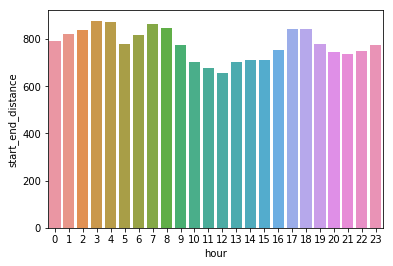

In [23]:
#不同时间骑行的距离是否不一样呢
hour_group=train.groupby("hour")
hour_distance=hour_group.agg({"start_end_distance":"mean"}).reset_index()
sns.barplot(x='hour',y='start_end_distance',data=hour_distance)

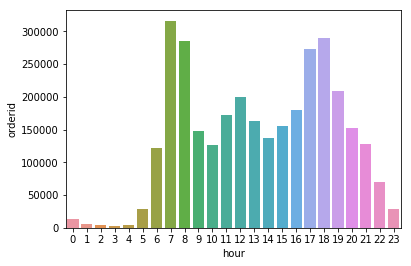

In [24]:
hour_group=train.groupby("hour")
hour_num_df=hour_group.agg({"orderid":"count"}).reset_index()
sns.barplot(x="hour",y="orderid",data=hour_num_df)

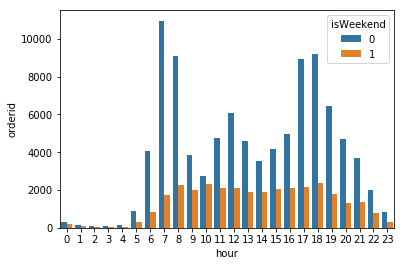

In [91]:
w_hour_group=train.groupby(["isWeekend","hour"])
w_hour_num_df=w_hour_group.agg({"orderid":"count"}).reset_index()
sns.barplot(x="hour",y="orderid",data=w_hour_num_df,hue='isWeekend')

In [94]:
def analysis_1(data,target):
    g1=data.groupby(['day',target])
    group_data=g1.agg({"orderid":"count","userid":"nunique","bikeid":"nunique"}).reset_index()
    for each in ["orderid","userid","bikeid"]:
        sns.distplot(group_data[each])
        plt.show()
    return group_data

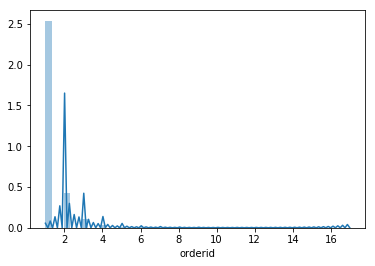

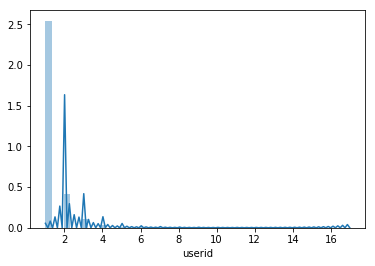

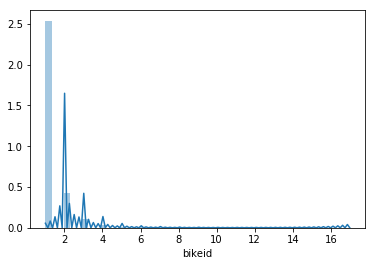

In [95]:
group_data=analysis_1(train,'geohashed_start_loc')

In [96]:
group_data.describe()

,orderid,userid,bikeid
count,100102.000000,100102.000000,100102.000000
mean,1.284330,1.281443,1.283930
std,0.770282,0.767258,0.769677
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,17.000000,17.000000,17.000000


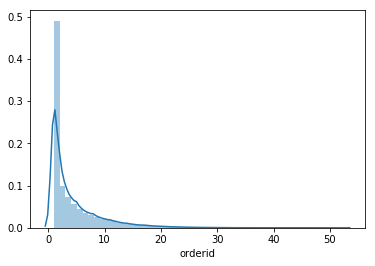

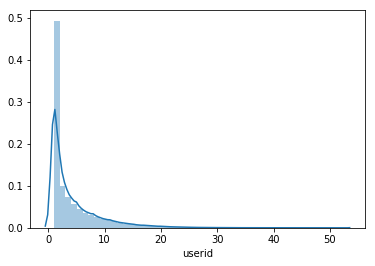

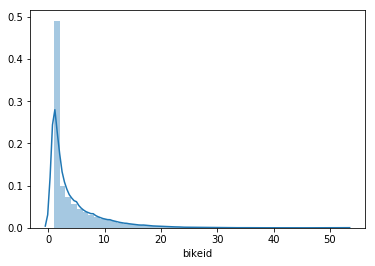

In [97]:
group_data_6=analysis_1(train,'geohashed_start_loc_6')

In [98]:
group_data_6.describe()

,orderid,userid,bikeid
count,28826.000000,28826.000000,28826.000000
mean,4.460001,4.428814,4.449872
std,4.909316,4.875670,4.895048
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,3.000000,2.000000,2.000000
75%,6.000000,6.000000,6.000000
max,52.000000,52.000000,52.000000


In [99]:
len(train['geohashed_start_loc'].unique())

37635

In [101]:
start_end=train.groupby(["day","geohashed_start_loc","geohashed_end_loc"])
start_end.agg({"orderid":"count","userid":"nunique","bikeid":"nunique","start_end_distance":"mean"}).reset_index().sort_values(by="orderid",ascending=False)

,day,geohashed_start_loc,geohashed_end_loc,orderid,userid,bikeid,start_end_distance
19911,2017-05-11,wx4gd3e,wx4gd90,5,5,5,819.382679
78463,2017-05-18,wx4f9ky,wx4f9ms,5,5,5,387.968806
78455,2017-05-18,wx4f9kn,wx4f9ms,5,5,5,538.279127
5210,2017-05-10,wx4f9ky,wx4f9mk,5,5,5,353.181903
70866,2017-05-16,wx4gd91,wx4gd2j,5,5,5,706.555396
7099,2017-05-10,wx4g04k,wx4epcz,4,4,4,819.290439
78484,2017-05-18,wx4f9mk,wx4f9ky,4,4,4,353.181903
70700,2017-05-16,wx4gc9b,wx4gc6g,4,4,4,856.273832
78099,2017-05-18,wx4f8p4,wx4f8p0,4,4,4,322.663271
86643,2017-05-19,wx4dzq2,wx4dzmc,4,4,4,215.679566


In [102]:
def _geohash(df):
    df['geohashed_start_loc_5']=df['geohashed_start_loc'].apply(lambda s:s[:5])
    df['geohashed_end_loc_5']=df['geohashed_end_loc'].apply(lambda s:s[:5])
    
    df['geohashed_start_loc_4']=df['geohashed_start_loc'].apply(lambda s:s[:4])
    df['geohashed_end_loc_4']=df['geohashed_end_loc'].apply(lambda s:s[:4])
    
    df['geohashed_start_loc_3']=df['geohashed_start_loc'].apply(lambda s:s[:3])
    df['geohashed_end_loc_3']=df['geohashed_end_loc'].apply(lambda s:s[:3])
    
    return df

In [103]:
train=_geohash(train)

In [104]:
train.head()

,orderid,userid,bikeid,biketype,starttime,geohashed_start_loc,geohashed_end_loc,weekday,hour,day,...,start_neighbors_6,inside_6,start_end_distance,isWeekend,geohashed_start_loc_5,geohashed_end_loc_5,geohashed_start_loc_4,geohashed_end_loc_4,geohashed_start_loc_3,geohashed_end_loc_3
338661,1286546,837157,152969,2,2017-05-11 12:58:11,wx4fb3w,wx4f8xy,3,12,2017-05-11,...,"{'n': 'wx4fb6', 'ne': 'wx4fbd', 'e': 'wx4fb9',...",0,1384.844640,0,wx4fb,wx4f8,wx4f,wx4f,wx4,wx4
3020310,1477712,325269,170954,2,2017-05-24 16:54:45,wx4ep8v,wx4ep8b,2,16,2017-05-24,...,"{'n': 'wx4ep9', 'ne': 'wx4epc', 'e': 'wx4epb',...",1,806.658178,0,wx4ep,wx4ep,wx4e,wx4e,wx4,wx4
2473870,1010215,557189,127564,2,2017-05-21 17:10:41,wx4e60t,wx4e60j,6,17,2017-05-21,...,"{'n': 'wx4e61', 'ne': 'wx4e63', 'e': 'wx4e62',...",1,142.008187,1,wx4e6,wx4e6,wx4e,wx4e,wx4,wx4
1542477,4037023,264355,412991,1,2017-05-15 13:44:47,wx4fg8n,wx4fg8h,0,13,2017-05-15,...,"{'n': 'wx4fg9', 'ne': 'wx4fgc', 'e': 'wx4fgb',...",1,322.663271,0,wx4fg,wx4fg,wx4f,wx4f,wx4,wx4
1329369,3359438,54967,347706,1,2017-05-15 11:20:44,wx4ehpq,wx4ehpu,0,11,2017-05-15,...,"{'n': 'wx4ek0', 'ne': 'wx4ek2', 'e': 'wx4ehr',...",1,352.709925,0,wx4eh,wx4eh,wx4e,wx4e,wx4,wx4


In [105]:
#出发点在g4范围内不一致的数量
train.loc[train['geohashed_start_loc_4']!=train['geohashed_end_loc_4']].shape

(7841, 27)

In [106]:
train.shape

(128564, 27)

In [107]:
#出发点在g3范围内不一致的数量
train.loc[train['geohashed_start_loc_3']!=train['geohashed_end_loc_3']].shape

#直接可以当作异常值剔除掉

(66, 27)

In [108]:
#出发点在g5范围内不一致的数量
train.loc[train['geohashed_start_loc_5']!=train['geohashed_end_loc_5']].shape

(30009, 27)

In [109]:
#出发点在g6范围内不一致的数量
train.loc[train['geohashed_start_loc_6']!=train['geohashed_end_loc_6']].shape

(102938, 27)

In [110]:
len(train['geohashed_start_loc_4'].unique())

34

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
gbc=GradientBoostingClassifier()

In [113]:
train.head()

,orderid,userid,bikeid,biketype,starttime,geohashed_start_loc,geohashed_end_loc,weekday,hour,day,...,start_neighbors_6,inside_6,start_end_distance,isWeekend,geohashed_start_loc_5,geohashed_end_loc_5,geohashed_start_loc_4,geohashed_end_loc_4,geohashed_start_loc_3,geohashed_end_loc_3
338661,1286546,837157,152969,2,2017-05-11 12:58:11,wx4fb3w,wx4f8xy,3,12,2017-05-11,...,"{'n': 'wx4fb6', 'ne': 'wx4fbd', 'e': 'wx4fb9',...",0,1384.844640,0,wx4fb,wx4f8,wx4f,wx4f,wx4,wx4
3020310,1477712,325269,170954,2,2017-05-24 16:54:45,wx4ep8v,wx4ep8b,2,16,2017-05-24,...,"{'n': 'wx4ep9', 'ne': 'wx4epc', 'e': 'wx4epb',...",1,806.658178,0,wx4ep,wx4ep,wx4e,wx4e,wx4,wx4
2473870,1010215,557189,127564,2,2017-05-21 17:10:41,wx4e60t,wx4e60j,6,17,2017-05-21,...,"{'n': 'wx4e61', 'ne': 'wx4e63', 'e': 'wx4e62',...",1,142.008187,1,wx4e6,wx4e6,wx4e,wx4e,wx4,wx4
1542477,4037023,264355,412991,1,2017-05-15 13:44:47,wx4fg8n,wx4fg8h,0,13,2017-05-15,...,"{'n': 'wx4fg9', 'ne': 'wx4fgc', 'e': 'wx4fgb',...",1,322.663271,0,wx4fg,wx4fg,wx4f,wx4f,wx4,wx4
1329369,3359438,54967,347706,1,2017-05-15 11:20:44,wx4ehpq,wx4ehpu,0,11,2017-05-15,...,"{'n': 'wx4ek0', 'ne': 'wx4ek2', 'e': 'wx4ehr',...",1,352.709925,0,wx4eh,wx4eh,wx4e,wx4e,wx4,wx4
